#**Acquire the two datasets Parkinson and Sonar, Mines vs. Rocks. To this end, you need to download the corresponding data files discussed in Section Introduction and load each dataset into numpy (arrays or matrices) in Python.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd, numpy as np
df_data_par = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/parkinsons.data')
df_data_par = df_data_par.sample(frac=1).reset_index(drop=True)

df_data_par.head()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S31_3,156.239,195.107,79.820,0.00694,0.00004,0.00403,0.00395,0.01209,0.02343,0.224,0.01289,0.01420,0.01720,0.03867,0.02020,19.196,1,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988
1,phon_R01_S32_6,118.747,123.723,109.836,0.00331,0.00003,0.00168,0.00171,0.00504,0.01043,0.099,0.00490,0.00621,0.00903,0.01471,0.00504,25.619,1,0.482296,0.723096,-6.448134,0.178713,2.034827,0.141422
2,phon_R01_S33_3,113.400,133.344,107.816,0.00451,0.00004,0.00219,0.00283,0.00658,0.04879,0.431,0.02385,0.02973,0.04370,0.07154,0.02278,19.013,1,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
3,phon_R01_S16_3,110.417,131.067,103.370,0.00784,0.00007,0.00352,0.00514,0.01056,0.03715,0.334,0.02032,0.02302,0.02802,0.06097,0.00969,21.422,1,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
4,phon_R01_S43_3,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,0.133,0.00748,0.00905,0.01148,0.02245,0.00478,26.547,0,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677


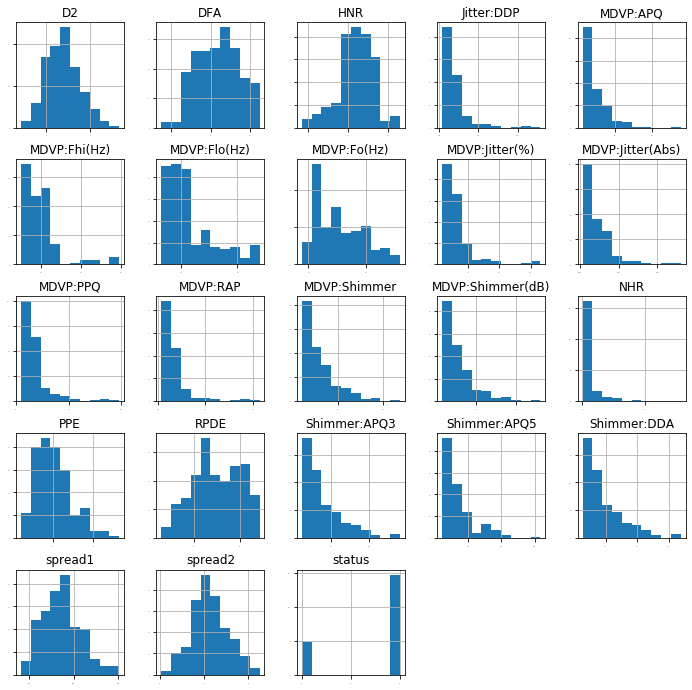

In [2]:
import matplotlib.pyplot as plt

df_data_par.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd, numpy as np
df_data_SMR = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sonar.all-data', header = None)

df_data_SMR = df_data_SMR.sample(frac=1).reset_index(drop=True)

df_data_SMR.head()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,0.3691,0.3750,0.3927,0.3308,0.1085,0.1139,0.3446,0.5441,0.6470,0.7276,0.7894,0.8264,0.8697,0.7836,0.7140,0.5698,0.2908,0.4636,0.6409,0.7405,0.8069,0.8420,1.0000,0.9536,0.6755,0.3905,0.1249,0.3629,0.6356,0.8116,0.7664,0.5417,0.2614,0.1723,0.2814,0.2764,0.1985,0.1502,0.1219,0.0493,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033,M
1,0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,0.1255,0.2473,0.3011,0.3747,0.4520,0.5392,0.6588,0.7113,0.7602,0.8672,0.8416,0.7974,0.8385,0.9317,0.8555,0.6162,0.4139,0.3269,0.3108,0.2554,0.3367,0.4465,0.5000,0.5111,0.5194,0.4619,0.4234,0.4372,0.4277,0.4433,0.3700,0.3324,0.2564,0.2527,0.2137,0.1789,0.1010,0.0528,0.0453,0.0118,0.0009,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049,M
2,0.0130,0.0006,0.0088,0.0456,0.0525,0.0778,0.0931,0.0941,0.1711,0.1483,0.1532,0.1100,0.0890,0.1236,0.1197,0.1145,0.2137,0.2838,0.3640,0.5430,0.6673,0.7979,0.9273,0.9027,0.9192,1.0000,0.9821,0.9092,0.8184,0.6962,0.5900,0.5447,0.5142,0.5389,0.5531,0.5318,0.4826,0.3790,0.1831,0.1750,0.1679,0.0674,0.0609,0.0375,0.0533,0.0278,0.0179,0.0114,0.0073,0.0116,0.0092,0.0078,0.0041,0.0013,0.0011,0.0045,0.0039,0.0022,0.0023,0.0016,R
3,0.0231,0.0351,0.0030,0.0304,0.0339,0.0860,0.1738,0.1351,0.1063,0.0347,0.0575,0.1382,0.2274,0.4038,0.5223,0.6847,0.7521,0.7760,0.7708,0.8627,1.0000,0.8873,0.8057,0.8760,0.9066,0.9430,0.8846,0.6500,0.2970,0.2423,0.2992,0.2285,0.2277,0.1529,0.1037,0.0352,0.1073,0.1373,0.1331,0.1454,0.1115,0.0440,0.0762,0.1381,0.0831,0.0654,0.0844,0.0595,0.0497,0.0313,0.0154,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030,R
4,0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,0.2707,0.0946,0.1020,0.4519,0.6737,0.6699,0.7066,0.5632,0.3785,0.2721,0.5297,0.7697,0.8643,0.9304,0.9372,0.6247,0.6024,0.6810,0.5047,0.5775,0.4754,0.2400,0.2779,0.1997,0.5305,0.7409,0.7775,0.4424,0.1416,0.3508,0.4482,0.4208,0.3054,0.2235,0.2611,0.2798,0.2392,0.2021,0.1326,0.0358,0.0128,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037,R


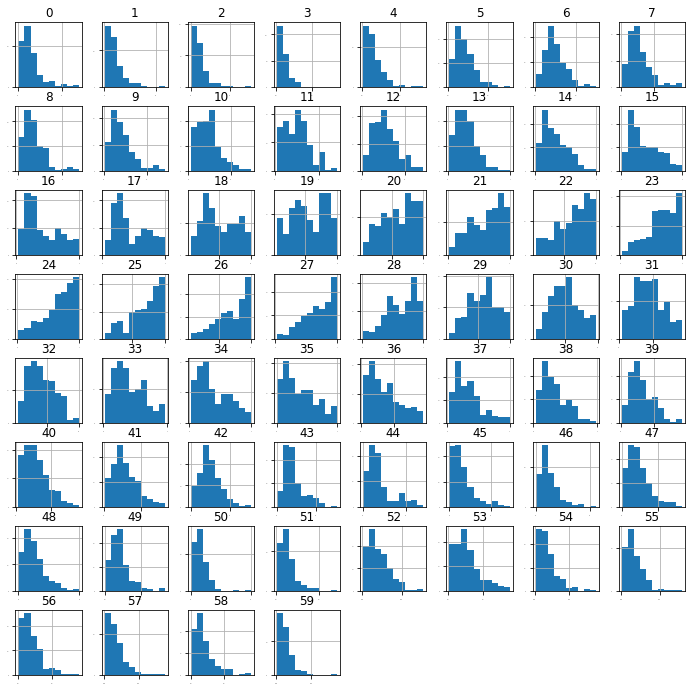

In [4]:
import matplotlib.pyplot as plt

df_data_SMR.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

# **Perform some statistical analysis on the datasets e.g. what are the distribution of the two classes? what are the distribution of some of the features? etc.**
- The distribution of this Parkinsons data is given by the status (y_i). And thus, it has a binary classification, since status can only take on the values 1 and 0 
  - The distribution of some of the features are 

- As for the Sonar, Mines vs Rocks, the distrubution is given by binary classification, since the output labels can only be of R - rocks or M - Mines 
  - The distribution of some of the features are observed as gaussian distribution and some have exponential distribution


In [5]:
data_par_X =  df_data_par.drop(['status','name'],axis=1).to_numpy()
data_par_y =  df_data_par.loc[:,'status'].to_numpy()

print(data_par_X)
print(data_par_y)
print(data_par_X.shape)

splitsize = round(data_par_X.shape[0]/8)
print(splitsize)

data_par_X_train = data_par_X[splitsize:]
data_par_y_train = data_par_y[splitsize:]

print(data_par_X_train)
print(data_par_y_train)
print(data_par_X_train.shape)
print(data_par_y_train.shape)

data_par_X_test = data_par_X[:splitsize]
data_par_y_test = data_par_y[:splitsize]

print(data_par_X_test)
print(data_par_y_test) 
print(data_par_X_test.shape)
print(data_par_y_test.shape)




[[1.562390e+02 1.951070e+02 7.982000e+01 ... 1.433590e-01 1.929715e+00
  1.819880e-01]
 [1.187470e+02 1.237230e+02 1.098360e+02 ... 1.787130e-01 2.034827e+00
  1.414220e-01]
 [1.134000e+02 1.333440e+02 1.078160e+02 ... 3.000670e-01 2.445502e+00
  2.594510e-01]
 ...
 [2.095160e+02 2.530170e+02 8.948800e+01 ... 1.293030e-01 2.784312e+00
  1.688950e-01]
 [1.153800e+02 1.231090e+02 1.086340e+02 ... 1.979380e-01 1.974857e+00
  1.840670e-01]
 [1.191000e+02 1.284420e+02 8.883300e+01 ... 1.756910e-01 2.451130e+00
  2.474550e-01]]
[1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 0 1]
(195, 22)
24
[[1.468450e+02 2.087010e+02 8.173700e+01 ... 1.961020e-01 2.31

In [6]:

# splitting data into X and y, and converting to matrix (array)... 
print("Total Data size", df_data_SMR.shape)
data_SMR_X =  df_data_SMR.drop(60, axis = 1).to_numpy()
data_SMR_y =  df_data_SMR.iloc[:,60].to_numpy()


class_values = ['R','M']

if  class_values in data_SMR_X:
  print ("true")
else:
  print ("false")

print(data_SMR_X)
print(data_SMR_X.shape)
print(data_SMR_y)

# changing string values to  0,1 ... binary 
# changes it globally... 
data_SMR_y[data_SMR_y == 'R'] = 0 
data_SMR_y[data_SMR_y == 'M'] = 1

print(data_SMR_y)

# splitting data set of features (X) and classes (y), into their respective 
# training and testing data sets
splitsize = round(data_SMR_X.shape[0]/8)
print(splitsize)

data_SMR_X_train = data_SMR_X[splitsize:]
data_SMR_y_train = data_SMR_y[splitsize:]

print(data_SMR_X_train)
print(data_SMR_y_train)
print(data_SMR_X_train.shape)

data_SMR_X_test = data_SMR_X[:splitsize]
data_SMR_y_test = data_SMR_y[:splitsize]

print(data_SMR_X_test)
print(data_SMR_y_test) 
print(data_SMR_X_test.shape)





Total Data size (208, 61)
false
[[0.0163 0.0198 0.0202 ... 0.0108 0.0083 0.0033]
 [0.0428 0.0555 0.0708 ... 0.0084 0.0113 0.0049]
 [0.013  0.0006 0.0088 ... 0.0022 0.0023 0.0016]
 ...
 [0.0132 0.008  0.0188 ... 0.014  0.0028 0.0064]
 [0.0123 0.0309 0.0169 ... 0.0092 0.0009 0.0044]
 [0.0307 0.0523 0.0653 ... 0.0121 0.0124 0.0055]]
(208, 60)
['M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M'
 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R'
 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M'
 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'R'
 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R'
 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M'
 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M'
 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'R'
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


# **Implement the two linear classifiers logistic regression and LDA from scratch, by following the equations discussed in class lectures. Apply your implemented algorithms to Parkinson and Sonar, Mines vs. Rocks.**

# **Define a function Accu-eval to evaluate the models’ accuracy. Accu-eval takes the predicted labels and the true labels as input and outputs the accuracy score.**

In [0]:
class LogisticRegression:
  #Constructor
  def __init__(self, learning_rate , max_iter=1000, epsilon = 1e-6):
    self.learning_rate = learning_rate 
    self.max_iter = max_iter
    self.epsilon = epsilon    

  def logistic_function (self, a):
    a = a.astype(float)
    return (1 / (1 + np.exp(-a)))

  def fit(self, X, y):        

    self.weights = np.zeros(X.shape[1]) # initialize weights 
    k_iter = 0 
    change_in_weights = 1
    for k in range(self.max_iter):
      # y = true_output 
      # sigma = predicted output 
      # X.T = X^T, i.e. X transpose 
      a = np.dot(X, self.weights)

      sigma_y_pred = self.logistic_function(a)
      gradient = (np.dot(X.T, (sigma_y_pred - y))/X.shape[0])
     
      # update rule 

      w_k = self.weights
      self.weights = self.weights - (self.learning_rate * gradient)
      change_in_weights = np.linalg.norm(abs(self.weights - w_k))

      # print("change in weights = ", change_in_weights)
      # convergence check
      if(change_in_weights < self.epsilon):
        print("convergence", k)
        break

      # y_pred = self.predict(X,)
      # print('iteration', k, 'accuracy', self.Accu_eval(y_pred,y))

  def predict(self, X,y):
    # calculate probabilities for a given feature vector x_new 
    a = np.dot(X, self.weights)
    y_pred = self.logistic_function(a)
    # print(y_pred)
    threshold = 0.5 
    return (y_pred > threshold).astype(int)

  def Accu_eval(self,y_pred, test):
    accuracy = np.mean(y_pred == test)
    return accuracy

  

In [98]:
learning_rate = 0.02
lr=LogisticRegression(learning_rate)

%time lr.fit(data_par_X_train,data_par_y_train)

pred = lr.predict(data_par_X_test)
print("Learning Rate: ", learning_rate)
print("Target: ", data_par_y_test)
print("Prediction: ", pred)
acc =  lr.Accu_eval(pred,data_par_y_test)
print("Accuracy", acc)

data  = {'y_actual': data_par_y_test, 'y_pred': pred}


df = pd.DataFrame(data, columns = ['y_actual', 'y_pred'])
confusion_matrix = pd.crosstab(df['y_actual'], df['y_pred'],  rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix)

true_pos = confusion_matrix[1][1]
false_neg = confusion_matrix[0][1]
false_pos = confusion_matrix[1][0]
true_neg = confusion_matrix[0][0]

accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg)
print('accuracy', accuracy)
recall = true_pos/(true_pos + false_neg)
print('recall', recall)
precision = true_pos/(true_pos + false_pos)
print('precision', precision)

CPU times: user 70.4 ms, sys: 622 µs, total: 71 ms
Wall time: 71.6 ms
Learning Rate:  0.02
Target:  [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1]
Prediction:  [1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1]
Accuracy 0.6666666666666666
Predicted  0   1
Actual          
0          2   3
1          5  14
accuracy 0.6666666666666666
recall 0.7368421052631579
precision 0.8235294117647058


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [0]:
class LDA:
  def mean_class(self, X):
    sum_mu = np.zeros(shape=(1, len(X[0])))
    for i in range(len(X)):
      sum_mu += np.array(X[i])
    sum_mu = sum_mu/len(X)
    return sum_mu 
  def sigma_class(self, X, mu):
    sum_sigma = np.zeros(shape=(len(X[0]), len(X[0])))
    for i in range(X.shape[0]): 
      diff = np.array(X[i].T) - mu
      sum_sigma += (diff*diff.T)
    return sum_sigma

  def log_odds_ratio(self,X,y):
    log_odds_ratio = np.zeros_like(y, float)
    for i in range(X.shape[0]):
      xTw = np.linalg.multi_dot([X[i], self.sigma_inv, (self.mu_1.T - self.mu_0.T)])
      log_odds_ratio[i] = self.w_0 + xTw
    return log_odds_ratio

  def fit(self, X, y):
    X_0  = X[y==0]
    X_1 = X[y==1]
    X_0 = np.array(X_0)
    X_1 = np.array(X_1)
    self.mu_0 = self.mean_class(X_0)
    self.mu_1 = self.mean_class(X_1)
    mu_0 = self.mu_0
    mu_1 = self.mu_1
    N_0 = X_0.shape[0]
    N_1 = X_1.shape[0]
    prob_0 = N_0/int(N_0+N_1)
    prob_1 = N_1/int(N_0+N_1)
    sigma_0 = self.sigma_class(X_0, mu_0)
    sigma_1 = self.sigma_class(X_1, mu_1)
    sigma = (sigma_0+sigma_1)/(N_0+N_1-2)
    # print("sigma_total = ", sigma)
    log_probs = np.log(prob_1/prob_0)
    # print(log_probs)
    self.sigma_inv = np.linalg.pinv(sigma)
    sigma_inv = self.sigma_inv
    self.w_0 = log_probs - (0.5)*np.linalg.multi_dot([mu_1,sigma_inv,mu_1.T]) + (0.5)*np.linalg.multi_dot([mu_0,sigma_inv,mu_0.T])
  def predict(self, X,y):
    log_odds_ratio = self.log_odds_ratio(X,y)
    return (log_odds_ratio > 0).astype(int)

  def Accu_eval(self,pred, true):
    accuracy = np.mean(pred == true)
    return accuracy
    


In [112]:
lda=LDA()
%time lda.fit(data_SMR_X,data_SMR_y)

pred = lda.predict(data_SMR_X_test, data_SMR_y_test)
print("Target: ", data_SMR_y_test)
print("Prediction: ", pred)
acc =  lr.Accu_eval(pred,data_SMR_y_test)
print("Accuracy", acc)

data  = {'y_actual': data_SMR_y_test, 'y_pred': pred}


df = pd.DataFrame(data, columns = ['y_actual', 'y_pred'])
confusion_matrix = pd.crosstab(df['y_actual'], df['y_pred'],  rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix)

true_pos = confusion_matrix[1][1]
false_neg = confusion_matrix[0][1]
false_pos = confusion_matrix[1][0]
true_neg = confusion_matrix[0][0]

accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg)
print('accuracy', accuracy)
recall = true_pos/(true_pos + false_neg)
print('recall', recall)
precision = true_pos/(true_pos + false_pos)
print('precision', precision)

CPU times: user 9.59 ms, sys: 4.17 ms, total: 13.8 ms
Wall time: 16.6 ms
Target:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1]
Prediction:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Accuracy 0.9230769230769231
Predicted   0   1
Actual           
0          12   1
1           1  12
accuracy 0.9230769230769231
recall 0.9230769230769231
precision 0.9230769230769231


# **Implement k-fold cross validation as a Python class. Use 10-fold cross validation to estimate performance in all of your experiments and you should evaluate performance using accuracy.**

In [0]:
class KfoldCrossValidation:
  #Constructor
  def __init__(self, k, classifier):
    self.k = k
    self.classifier = classifier 

  def k_folds(self, X,y):
    self.folds_X = np.array_split(X, self.k)
    self.folds_y = np.array_split(y, self.k)

  def cross_validation(self): 
    pred = []
    true = []
    for i in range(self.k):
      training_set_X = self.folds_X.copy() 
      training_set_y = self.folds_y.copy() 

      validation_set_X = self.folds_X[i].copy()
      validation_set_y = self.folds_y[i].copy()

      del training_set_X[i]
      del training_set_y[i]

      training_set_X = np.concatenate(training_set_X)
      training_set_y = np.concatenate(training_set_y)

      self.classifier.fit(training_set_X.copy(),training_set_y.copy())

      pred.extend(self.classifier.predict(validation_set_X, validation_set_y))
      true.extend(validation_set_y)

      print("fold: ", i+1," -> Accuracy: " ,self.classifier.Accu_eval(np.asarray(pred), np.asarray(true)))


In [138]:
print("Logistic Regression - Kfold Cross Validation - Parkinsons Data")
lr = LogisticRegression(0.02)
kfcv = KfoldCrossValidation(10,lr)
kfcv.k_folds(data_par_X,data_par_y)
performance = kfcv.cross_validation()

Logistic Regression - Kfold Cross Validation - Parkinsons Data
fold:  1  -> Accuracy:  0.8
fold:  2  -> Accuracy:  0.775
fold:  3  -> Accuracy:  0.6
fold:  4  -> Accuracy:  0.65
fold:  5  -> Accuracy:  0.69


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


fold:  6  -> Accuracy:  0.6722689075630253
fold:  7  -> Accuracy:  0.6159420289855072
fold:  8  -> Accuracy:  0.6305732484076433
fold:  9  -> Accuracy:  0.6477272727272727
fold:  10  -> Accuracy:  0.6564102564102564


In [135]:
print("LDA - Kfold Cross Validation - Parkinsons Data")
lda = LDA()
kfcv = KfoldCrossValidation(10,lda)
kfcv.k_folds(data_par_X,data_par_y)
kfcv.cross_validation()

LDA - Kfold Cross Validation - Parkinsons Data
fold:  1  -> Accuracy:  0.9
fold:  2  -> Accuracy:  0.95
fold:  3  -> Accuracy:  0.9333333333333333
fold:  4  -> Accuracy:  0.925
fold:  5  -> Accuracy:  0.93
fold:  6  -> Accuracy:  0.9327731092436975
fold:  7  -> Accuracy:  0.9057971014492754
fold:  8  -> Accuracy:  0.89171974522293
fold:  9  -> Accuracy:  0.8977272727272727
fold:  10  -> Accuracy:  0.882051282051282


In [136]:
print("Logistic Regression - Kfold Cross Validation - SMR Data")
lr = LogisticRegression(0.04)
kfcv = KfoldCrossValidation(10,lr)
kfcv.k_folds(data_SMR_X,data_SMR_y)
performance = kfcv.cross_validation()

Logistic Regression - Kfold Cross Validation - SMR Data
fold:  1  -> Accuracy:  0.6666666666666666
fold:  2  -> Accuracy:  0.7380952380952381
fold:  3  -> Accuracy:  0.7142857142857143
fold:  4  -> Accuracy:  0.7142857142857143
fold:  5  -> Accuracy:  0.7238095238095238
fold:  6  -> Accuracy:  0.7063492063492064
fold:  7  -> Accuracy:  0.7142857142857143
fold:  8  -> Accuracy:  0.7142857142857143
fold:  9  -> Accuracy:  0.7074468085106383
fold:  10  -> Accuracy:  0.7115384615384616


In [137]:
print("LDA - Kfold Cross Validation - SMR Data")
lda = LDA()
kfcv = KfoldCrossValidation(10,lda)
kfcv.k_folds(data_SMR_X,data_SMR_y)
performance = kfcv.cross_validation()

LDA - Kfold Cross Validation - SMR Data
fold:  1  -> Accuracy:  0.8571428571428571
fold:  2  -> Accuracy:  0.7857142857142857
fold:  3  -> Accuracy:  0.7936507936507936
fold:  4  -> Accuracy:  0.75
fold:  5  -> Accuracy:  0.7333333333333333
fold:  6  -> Accuracy:  0.7380952380952381
fold:  7  -> Accuracy:  0.7482993197278912
fold:  8  -> Accuracy:  0.7738095238095238
fold:  9  -> Accuracy:  0.7659574468085106
fold:  10  -> Accuracy:  0.7644230769230769


In [0]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')